In [ ]:
#DATA COLLECTION
import pandas as pd
from sklearn import datasets

mnist = datasets.fetch_openml('mnist_784', version=1)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
#DATAFRAME FORMAT
mnist_df = pd.DataFrame(mnist.data)
mnist_df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#SHAPE FUNCTION = (Nbr of rows, Nbr of columns)
data_shape = mnist_df.shape
print("Data shape:", data_shape)

Data shape: (70000, 784)


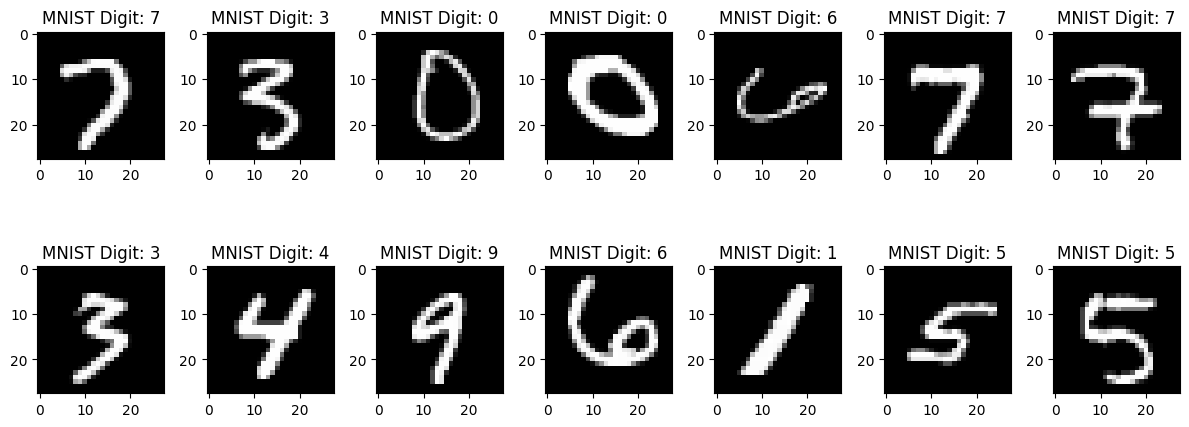

In [ ]:
#IMAGES VISUALIZATION
import matplotlib.pyplot as plt
import numpy as np

# Define the number of rows and columns in the grid
num_rows = 2
num_cols = 7  # Adjust the number of columns as needed

# Create a figure and axis for the grid of images
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 5))

# Randomly select the indices of images to display
num_images_to_display = num_rows * num_cols
selected_indices = np.random.choice(mnist_df.shape[0], num_images_to_display)

for i, ax in enumerate(axes.flat):
    # Get the image data and label for the current index
    index = selected_indices[i]
    image_data = mnist_df.iloc[index].values.reshape(28, 28)
    label = mnist.target[index]

    # Display the image
    ax.imshow(image_data, cmap='gray')
    ax.set_title(f"MNIST Digit: {label}")
    ax.axis('on')

# Adjust the spacing and display the grid
plt.tight_layout()
plt.show()


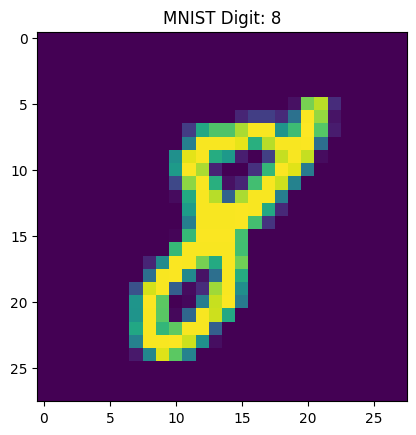

In [ ]:
import matplotlib.pyplot as plt
index_to_display = 17  #number 8

# Select the image data for the specified index
image_data = mnist_df.iloc[index_to_display].values.reshape(28, 28)

# Plot the image
plt.imshow(image_data)
plt.title(f"MNIST Digit: {mnist.target[index_to_display]}")
plt.show()

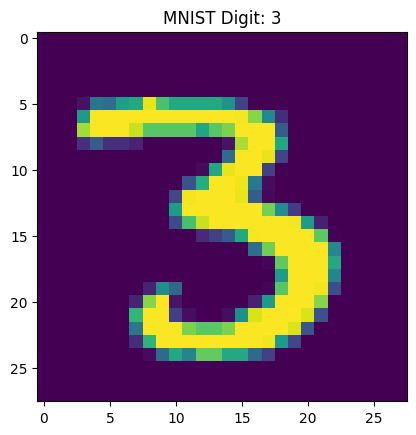

In [ ]:
import matplotlib.pyplot as plt
index_to_display = 12  #number 3

# Select the image data for the specified index
image_data = mnist_df.iloc[index_to_display].values.reshape(28, 28)

# Plot the image
plt.imshow(image_data)
plt.title(f"MNIST Digit: {mnist.target[index_to_display]}")
plt.show()

In [ ]:
#Display the 7 first targets
mnist.target.head(7)


0    5
1    0
2    4
3    1
4    9
5    2
6    1
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [ ]:
#Display of the target "3" and "8"
labels = mnist.target[(mnist.target == '3') | (mnist.target == '8')]
labels.head(7)

7     3
10    3
12    3
17    8
27    3
30    3
31    8
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [ ]:
#Filter the targets by the values "3" and "8"
data = mnist_df[(mnist.target == '3') | (mnist.target == '8')]

#DATA SPLITTING
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


In [ ]:
#Convert the features from pixels [1,784] to binary [0,1]
X_train = X_train / 255.0
X_test = X_test / 255.0


In [ ]:
#MODELING
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', C=1.0) #Standard Default Margin = C=1.0 / Low Margin = 0.1 / Hight Margin = 10
svm_model.fit(X_train, y_train)


SVC(kernel='linear')

In [ ]:
#EVALUATION PERFORMANCE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:", conf_matrix)
print("Classification Report:\n", classification_rep)


Accuracy: 0.9717251252684324
Confusion Matrix: [[1380   48]
 [  31 1335]]
Classification Report:
               precision    recall  f1-score   support

           3       0.98      0.97      0.97      1428
           8       0.97      0.98      0.97      1366

    accuracy                           0.97      2794
   macro avg       0.97      0.97      0.97      2794
weighted avg       0.97      0.97      0.97      2794

